In [1]:
import pandas as pd 

df = pd.read_csv("../data/dataset.csv")


In [2]:
print("Shape du dataset :", df.shape)
df.head()

Shape du dataset : (20000, 15)


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   subject   18539 non-null  str  
 1   body      19998 non-null  str  
 2   answer    19996 non-null  str  
 3   type      20000 non-null  str  
 4   queue     20000 non-null  str  
 5   priority  20000 non-null  str  
 6   language  20000 non-null  str  
 7   tag_1     20000 non-null  str  
 8   tag_2     19954 non-null  str  
 9   tag_3     19905 non-null  str  
 10  tag_4     18461 non-null  str  
 11  tag_5     13091 non-null  str  
 12  tag_6     7351 non-null   str  
 13  tag_7     3928 non-null   str  
 14  tag_8     1907 non-null   str  
dtypes: str(15)
memory usage: 19.9 MB


In [4]:
df.describe()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
count,18539,19998,19996,20000,20000,20000,20000,20000,19954,19905,18461,13091,7351,3928,1907
unique,18539,19998,19996,4,10,3,2,148,204,344,481,578,566,492,386
top,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,Technical Support,medium,en,Technical,Performance,IT,Tech Support,Tech Support,Resolution,Resolution,Documentation
freq,1,1,1,7978,5824,8144,11923,5034,2795,3309,3436,2287,841,417,162


In [5]:
print(df.isnull().sum())


subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64


In [6]:
# Vérifier combien de tickets il y a par type pour comprendre la distribution des classes

print(df["type"].value_counts())

type
Incident    7978
Request     5763
Problem     4184
Change      2075
Name: count, dtype: int64


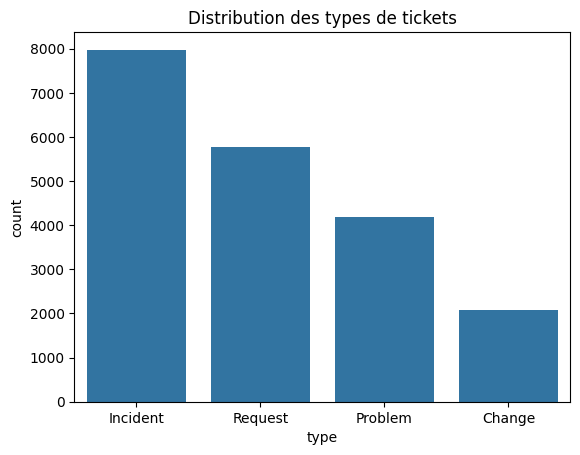

In [7]:
# Visualiser la distribution des tickets par type pour mieux comprendre l'équilibre des classes

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="type")
plt.title("Distribution des types de tickets")
plt.show()


In [8]:
# Calculer la longueur des emails pour analyser la distribution et détecter outliers

df["body_length"] = df["body"].str.len()

print(df["body_length"].describe())


count    19998.000000
mean       394.477548
std        248.241982
min          4.000000
25%        198.000000
50%        357.000000
75%        555.000000
max       2259.000000
Name: body_length, dtype: float64


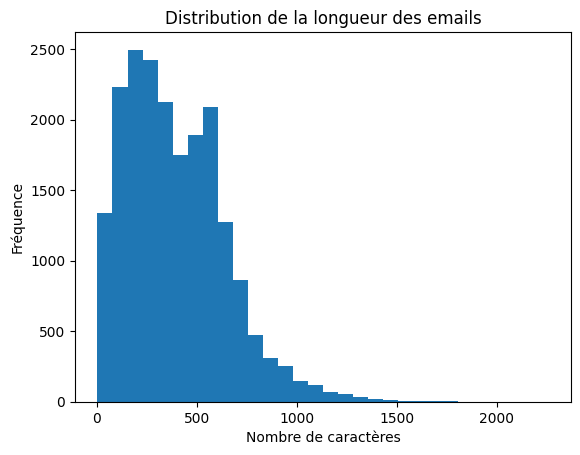

In [9]:
# Visualiser la distribution des longueurs d'emails pour mieux comprendre leur variation

plt.hist(df["body_length"], bins=30)
plt.title("Distribution de la longueur des emails")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()


In [10]:
# Fusionner le sujet et le corps des emails pour créer un texte complet à analyser

df["text"] = df["subject"] + " " + df["body"]

print(df["text"].head())


0    Unvorhergesehener Absturz der Datenanalyse-Pla...
1    Customer Support Inquiry Seeking information o...
2    Data Analytics for Investment I am contacting ...
3    Krankenhaus-Dienstleistung-Problem Ein Medien-...
4    Security Dear Customer Support, I am reaching ...
Name: text, dtype: str


In [11]:
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,body_length,text
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN,252.0,Unvorhergesehener Absturz der Datenanalyse-Pla...
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN,225.0,Customer Support Inquiry Seeking information o...
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN,696.0,Data Analytics for Investment I am contacting ...
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN,221.0,Krankenhaus-Dienstleistung-Problem Ein Medien-...
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN,675.0,"Security Dear Customer Support, I am reaching ..."
